In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing

inputsData =  pd.read_csv("InputsNormalization.csv",  header = None)
OutputsData =  pd.read_csv("OutputsNormalization.csv",  header = None)

#### Mettre les Attributs dans le vecteur inputs #################
Inputs = np.array(inputsData)
Inputs = Inputs[:200000,:]
################################################################


########## mettre les labels dans le vecteur Output ###############         
Outputs = np.array(OutputsData)
Outputs = np.squeeze(np.asarray(Outputs))
Outputs = Outputs[:200000]
##################################################################



#### les 1eres 41413 ligne sont des 1 (ransomeware) ######
''' On devise notre Data de cette maniere 
    60% des 1 + 60% du reste  en outputs/inputs training ==> Outputs_train / Inputs_train
    20% des 1 + 20% du reste en outputs/inputs validation => Outputs_Va / Inputs_Va
    20% des 1 + 20% du rest en outputs/inputs test ========> Outputs_test / Inputs_test  '''


########### Outputs/Inputs training 60% ########################
Outputs_train = np.append(Outputs[:24847] , Outputs[41413:136566] , axis = 0 )
Inputs_train = np.append(Inputs[:24847,:] , Inputs[41413:136566,:] , axis = 0  )
Inputs_train = np.append(np.ones((Inputs_train.shape[0],1)),Inputs_train, axis=1 ) ### add X0=1 ####

####################### Outputs/Inputs Validation 20% #################################
Outputs_va = np.append(Outputs[24847:33130] , Outputs[136566:168283] , axis = 0 )
Inputs_va = np.append(Inputs[24847:33130,:] , Inputs[136566:168283,:] , axis = 0 )
Inputs_va = np.append(np.ones((Inputs_va.shape[0],1)),Inputs_va, axis=1 ) ### add X0=1 ####

################# Outputs/Inputs Test 20% ################################
Outputs_test = np.append(Outputs[33130:41413] , Outputs[168283:200000] , axis = 0 )
Inputs_test = np.append(Inputs[33130:41413,:] , Inputs[168283:200000,:] , axis = 0 )
Inputs_test = np.append(np.ones((Inputs_test.shape[0],1)),Inputs_test, axis=1 ) ### add X0=1 ####



theta = np.ones(Inputs_train.shape[1]) #### theta #####

In [2]:
### First : build the hypothese  ######
def Team4sigmoid(z):
    return 1/ (1+ np.exp(np.sum(-z)))
''' z est la multiplication en [theta]T * [x]'''
#####################################



##### Cost Function ########
def Team4cost(theta ,Inputs_train,Outputs_train,lambdaa):
    Y = Outputs_train
    X = Inputs_train
    first = 0.0
    second = 0.0
    for i in range(X.shape[0]):
        first = Y[i]*np.log(Team4sigmoid(np.dot(X[i,:],theta.T)))+first
        second = ((1-Y[i]) * np.log(1-(Team4sigmoid(np.dot(X[i,:],theta.T)))))+second
        
    a = first+second+ (np.sum(theta**2)*(lambdaa/2*X.shape[0]))
                                    
    return - a/X.shape[0]

##### GradientDescent #########
def Team4gradientDescent(theta , Inputs_train ,Outputs_train,lambdaa,alpha):
    Y = Outputs_train
    X = Inputs_train
    costTab = np.array([Team4cost(theta ,Inputs_train,Outputs_train,lambdaa)])
    costmin = costTab[0]
    ThetaFinal = theta
    for i in range(150):
        inclu = Team4sigmoid(np.dot(X,theta.T))-Y
        gradient = ((np.dot(X.T,inclu))/X.shape[0])+ (theta*(lambdaa/X.shape[0]))
        theta = theta - gradient * alpha
        costTab = np.append(costTab,Team4cost(theta ,Inputs_train,Outputs_train,lambdaa))
        if(costmin > costTab[i+1]):
            costmin = costTab[i+1] 
            ThetaFinal = theta
        
    return costTab,ThetaFinal,costmin



### calculing result of classification #####
def Team4Result_of_Sigmoid(Inputs , BestThetas , Outputs):
    result = np.array([])

    for i in range(Inputs.shape[0]):
        a = Team4sigmoid(np.dot(Inputs[i,:],BestThetas.T))
        if (a> 0.5):
            result = np.append(result,1)
        else:
            result = np.append(result,0)

#### Evaluation########

    ########Accuracy######
    tmp = 0 ;
    for i in range (result.shape[0]):
        if (result[i]== Outputs[i]):
            tmp= tmp+1
    Accurancy = (tmp/result.shape[0])*100
    print("Accuracy = ",Accurancy)

    ########Error#########
    tmp = 0 ;
    for i in range (result.shape[0]):
        if (result[i] != Outputs[i]):
            tmp= tmp+1
    Error = (tmp/result.shape[0])*100
    print("Classification Error = ",Error)



    ########Recall#########
    tmp = 0 
    tmp2 = 0
    for i in range (result.shape[0]):
        if(result[i]==1 and Outputs[i]==1):
            tmp=tmp+1
        if(result[i]==1 and Outputs[i]==0):
            tmp2=tmp2+1
    Recall = (tmp/(tmp+tmp2))*100
    print("Recale = ",Recall)

    ########Precision########
    tmp = 0 
    tmp2 = 0 
    for i in range (result.shape[0]):
        if (result[i]==1 and Outputs[i]==1):
            tmp= tmp+1
        if (result[i]==1 and Outputs[i]==0):
            tmp2= tmp2+1
    Precision = (tmp/result.shape[0])*100
    print("Precision = ",Precision)

    ######Score########
    Score = (2*Precision*Recall)/(Precision+Recall)
    print("Score = ",Score)

In [3]:
#####Main######
lambdaa = 0.001
alpha = 0.08
costt = Team4gradientDescent(theta , Inputs_train ,Outputs_train,lambdaa,alpha)
print("best thetas = ",costt[1] )
print("minimum cost = ",costt[2] )

BestThetas = costt[1]
Team4Result_of_Sigmoid(Inputs_va , BestThetas , Outputs_va)
Team4Result_of_Sigmoid(Inputs_test , BestThetas , Outputs_test)

<ipython-input-2-3f349151bb05>:3: RuntimeWarning: overflow encountered in exp
  return 1/ (1+ np.exp(np.sum(-z)))


best thetas =  [-0.48499347  1.83218166  1.01885592  0.99983389  1.06599888  1.01049505
  0.99992192  0.99932409]
minimum cost =  0.5186073771870725
Accuracy =  92.5475
Classification Error =  7.4525
Recale =  73.69926694081889
Precision =  20.61
Score =  32.21193295041613
Accuracy =  79.19500000000001
Classification Error =  20.805
Recale =  49.88185398364132
Precision =  20.5825
Score =  29.140784001415803


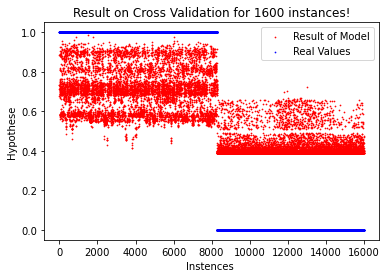

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

####plot result on 16000 instances from cross validation data #####
result = np.array([])

for i in range(16000):
    a = Team4sigmoid(np.dot(Inputs_va[i,:],BestThetas.T))
    if (a> 0.5):
        result = np.append(result,a+0.01)### just to keep distence bitween two classe [0,1]
    else:
        result = np.append(result,a-0.01)### just to keep distence bitween two classe [0,1]

b = np.arange(-16000,16000) 
plt.scatter(b[16000:32000],result , label= "Result of Model", color= "red",  marker= "o", s=0.5) 
plt.scatter(b[16000:32000],Outputs_va[0:16000] ,label= "Real Values" , color= "blue",  marker= "o", s=0.5)

plt.xlabel('Instences ') 
plt.ylabel('Hypothese') 
plt.title('Result on Cross Validation for 1600 instances!') 
plt.legend()
plt.show()

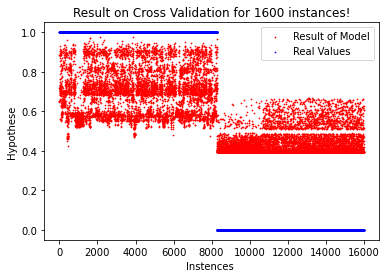

In [5]:
####plot result on 16000 instances from test data #####
result = np.array([])

for i in range(16000):
    a = Team4sigmoid(np.dot(Inputs_test[i,:],BestThetas.T))
    if (a> 0.5):
        result = np.append(result,a+0.01)### just to keep distence bitween two classe [0,1]
    else:
        result = np.append(result,a-0.01)### just to keep distence bitween two classe [0,1]

b = np.arange(-16000,16000) 
plt.scatter(b[16000:32000],result , label= "Result of Model", color= "red",  marker= "o", s=0.5) 
plt.scatter(b[16000:32000],Outputs_test[0:16000] ,label= "Real Values" , color= "blue",  marker= "o", s=0.5)

plt.xlabel('Instences ') 
plt.ylabel('Hypothese') 
plt.title('Result on Cross Validation for 1600 instances!') 
plt.legend()
plt.show()
    

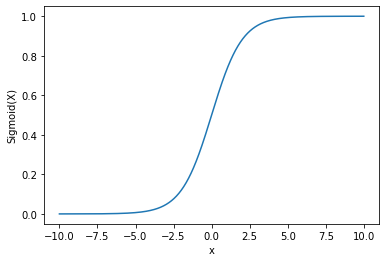

In [105]:
x = np.linspace(-10, 1, 1000) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 
